In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab
import glob, os
import scipy.stats as stats
from scipy.stats import gaussian_kde
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import timeit
%matplotlib inline

In [2]:
#KC Metro
KC_train = pd.read_csv(r'R:/Angela/fast_trips/internal dataset/KC_90_df_train.csv')

In [8]:
SF_train.columns[:50]

Index([u'Unnamed: 0', u'ON', u'OFF', u'VEHNO', u'ANAME', u'STOPA', u'YR',
       u'HR', u'MIN', u'SEC', u'DHR', u'DMIN', u'DSEC', u'ROUTE', u'LOAD',
       u'date_id', u'pre_load', u'COMPUTE_TIMESTOP', u'COMPUTE_DOORCOLSE',
       u'COMPUTE_DOORDWELL', u'Doors', u'Artic', u'Floor', u'capacity',
       u'two_doors', u'three_doors', u'Route Type', u'Express', u'OWL',
       u'Rapid', u'on_threedoors', u'off_threedoors', u'on_floor',
       u'off_floor', u'floor_threedoors', u'floor_twodoors', u'on_express',
       u'off_express', u'on_rapid', u'off_rapid', u'on_owl', u'off_owl',
       u'max_pasg', u'abs_pasg', u'pre_standees', u'pre_crowding', u'friction',
       u'eol', u'vehno_date', u'5446_1'],
      dtype='object')

In [4]:
#SF
SF_train = pd.read_csv(r'R:/Angela/fast_trips/internal dataset/SF_90_df_train.csv')

In [5]:
SF_train['on+off'] = SF_train['ON'] + SF_train['OFF']

In [6]:
def sort_data(data, col1, col2):
    sorted_data = data.groupby(col1)[col2]
    df_sorted_data = pd.DataFrame(sorted_data.mean())
    df_sorted_data[col1] = df_sorted_data.index
    return df_sorted_data

In [36]:
KC = sort_data(KC_train, 'ON+OFF', 'DOOR_OPEN_SEC')
SF = sort_data(SF_train, 'on+off', 'COMPUTE_DOORDWELL')

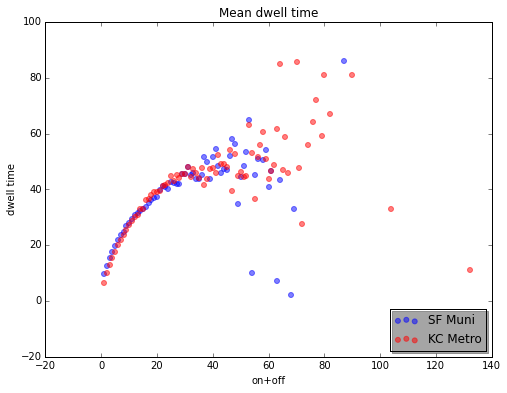

In [47]:
x1 = SF_df['on+off']
y1 = SF_df['COMPUTE_DOORDWELL']
x2 = KC['ON+OFF']
y2 = KC['DOOR_OPEN_SEC']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, title="Mean dwell time")
ax.scatter(x1, y1, s=25, color="blue", alpha=0.5, label='SF Muni')
ax.scatter(x2, y2, s=25, color="red", alpha=0.5, label='KC Metro')
plt.xlabel('on+off')
plt.ylabel('dwell time')
ax.legend(loc='lower right', shadow=True)

In [9]:
KC = sort_data(KC_train, 'ONS', 'DOOR_OPEN_SEC')
SF = sort_data(SF_train, 'ON', 'COMPUTE_DOORDWELL')

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


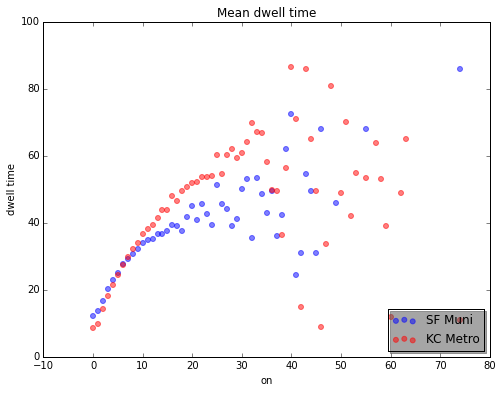

In [11]:
x1 = SF['ON']
y1 = SF['COMPUTE_DOORDWELL']
x2 = KC['ONS']
y2 = KC['DOOR_OPEN_SEC']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, title="Mean dwell time")
ax.scatter(x1, y1, s=25, color="blue", alpha=0.5, label='SF Muni')
ax.scatter(x2, y2, s=25, color="red", alpha=0.5, label='KC Metro')
plt.xlabel('on')
plt.ylabel('dwell time')
ax.legend(loc='lower right', shadow=True)

In [15]:
KC = sort_data(KC_train, 'OFFS', 'DOOR_OPEN_SEC')
SF = sort_data(SF_train, 'OFF', 'COMPUTE_DOORDWELL')

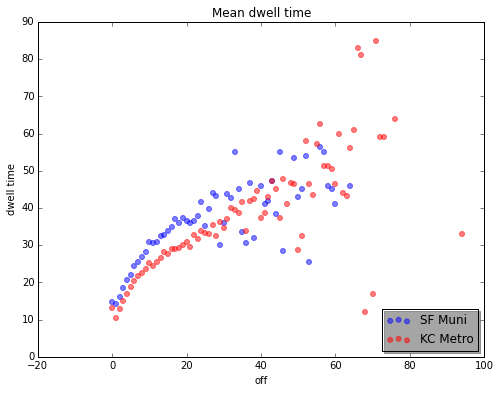

In [17]:
x1 = SF['OFF']
y1 = SF['COMPUTE_DOORDWELL']
x2 = KC['OFFS']
y2 = KC['DOOR_OPEN_SEC']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, title="Mean dwell time")
ax.scatter(x1, y1, s=25, color="blue", alpha=0.5, label='SF Muni')
ax.scatter(x2, y2, s=25, color="red", alpha=0.5, label='KC Metro')
plt.xlabel('off')
plt.ylabel('dwell time')
ax.legend(loc='lower right', shadow=True)

In [18]:
KC = sort_data(KC_train, 'friction', 'DOOR_OPEN_SEC')
SF = sort_data(SF_train, 'friction', 'COMPUTE_DOORDWELL')

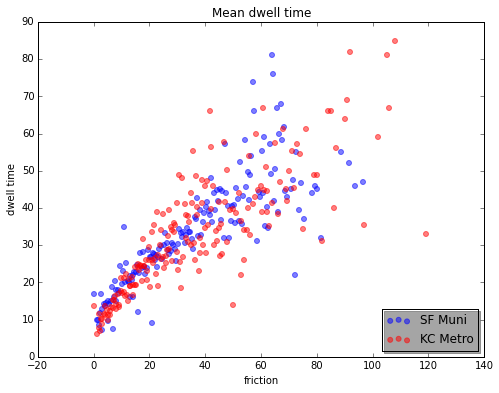

In [19]:
x1 = SF['friction']
y1 = SF['COMPUTE_DOORDWELL']
x2 = KC['friction']
y2 = KC['DOOR_OPEN_SEC']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, title="Mean dwell time")
ax.scatter(x1, y1, s=25, color="blue", alpha=0.5, label='SF Muni')
ax.scatter(x2, y2, s=25, color="red", alpha=0.5, label='KC Metro')
plt.xlabel('friction')
plt.ylabel('dwell time')
ax.legend(loc='lower right', shadow=True)